## Обробка та аналіз біомедичних даних
### БС-24
### Манзик Максим
## Лабораторна робота №6

### Дисперсійний аналіз

Для виконання роботи було обрано датасет, що містить інформацію, зібрану з онлайн-платформи про шахмати. Він охоплює різні атрибути, переможцем, оціненням, ходами тощо.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\kepkp\PycharmProjects\Study\python_deepdive\tasks\Analytics\LB_6\games.csv")[:500]
print(df)

           id  rated    created_at  last_move_at  turns victory_status winner  \
0    TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1    l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2    mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3    kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4    9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   
..        ...    ...           ...           ...    ...            ...    ...   
495  lm8AKQIn   True  1.502730e+12  1.502730e+12    120           mate  black   
496  uiJ5thnm   True  1.502730e+12  1.502730e+12     41           mate  white   
497  GHlw6n8z   True  1.504210e+12  1.504220e+12     42         resign  black   
498  yLhzi5Dd   True  1.503470e+12  1.503470e+12     63         resign  white   
499  brPQOL4Y  False  1.503360e+12  1.503360e+12     23         resign  black   

    increment_code       wh

Будемо використовувати змінну, що характеризує стать, рід діяльності, а в якості кількісної змінної буде змінна що показує дані про локацію, а саме широту місцезнаходження замовника.

In [98]:
male = df.dropna(subset=['latitude']).loc[df['Gender'] == 'Male', 'latitude']
female = df.dropna(subset=['latitude']).loc[df['Gender'] == 'Female', 'latitude']

student = df.dropna(subset=['latitude']).loc[df['Occupation'] == 'Student', 'latitude']
employee = df.dropna(subset=['latitude']).loc[df['Occupation'] == 'Employee', 'latitude']
self_empl = df.dropna(subset=['latitude']).loc[df['Occupation'] == 'Self Employeed', 'latitude']

male_student = df.loc[(df['Occupation'] == 'Student') & (df['Gender'] == 'Male'), 'latitude']
male_employee = df.loc[(df['Occupation'] == 'Employee') & (df['Gender'] == 'Male'), 'latitude']
male_self_empl = df.loc[(df['Occupation'] == 'Self Employeed') & (df['Gender'] == 'Male'), 'latitude']
female_student = df.loc[(df['Occupation'] == 'Student') & (df['Gender'] == 'Female'), 'latitude']
female_employee = df.loc[(df['Occupation'] == 'Employee') & (df['Gender'] == 'Female'), 'latitude']
female_self_empl = df.loc[(df['Occupation'] == 'Self Employeed') & (df['Gender'] == 'Female'), 'latitude']

Перевіримо розподіли на нормальність. Використаємо тест Шапіро-Вілка. Сформулюємо гіпотези

Н0 - Вибірка "male" має нормальний розподіл
Н1 - Вибірка "male" має розподіл, відмінний від нормального

In [23]:
from scipy import stats

W_statistic, p_value = stats.shapiro(male)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9809269309043884
P-value: 0.004277246072888374


Отримали р-значення менше за 0.05, отже вибірка розподілена не за нормальним законом.

Н0 - Вибірка "female" має нормальний розподіл
Н1 - Вибірка "female" має розподіл, відмінний від нормального 

In [24]:
W_statistic, p_value = stats.shapiro(female)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9752172827720642
P-value: 0.004499049391597509


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "student" має нормальний розподіл
Н1 - Вибірка "student" має розподіл, відмінний від нормального 

In [51]:
W_statistic, p_value = stats.shapiro(student)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9725870490074158
P-value: 0.00045763005618937314


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "employee" має нормальний розподіл
Н1 - Вибірка "employee" має розподіл, відмінний від нормального 

In [52]:
W_statistic, p_value = stats.shapiro(employee)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9748121500015259
P-value: 0.025593172758817673


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "self_empl" має нормальний розподіл
Н1 - Вибірка "self_empl" має розподіл, відмінний від нормального 

In [54]:
W_statistic, p_value = stats.shapiro(self_empl)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9739680886268616
P-value: 0.2864520847797394


Отримали р-значення більше за 0.05, отже маємо право прийняти нульову гіпотезу і зробити висновок, що дані можуть бути розподілені за нормальним законом.

Н0 - Вибірка "male_student" має нормальний розподіл
Н1 - Вибірка "male_student" має розподіл, відмінний від нормального 

In [56]:
W_statistic, p_value = stats.shapiro(male_student)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9647836685180664
P-value: 0.004050743766129017


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "male_employee" має нормальний розподіл
Н1 - Вибірка "male_employee" має розподіл, відмінний від нормального 

In [61]:
W_statistic, p_value = stats.shapiro(male_employee)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9671875238418579
P-value: 0.06654781848192215


Отримали р-значення більше за 0.05, отже можемо прийняти нульову гіпотезу і зробити висновок, що дані розподілені за нормальним законом.

Н0 - Вибірка "male_self_empl" має нормальний розподіл
Н1 - Вибірка "male_self_empl" має розподіл, відмінний від нормального 

In [62]:
W_statistic, p_value = stats.shapiro(male_self_empl)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.964942216873169
P-value: 0.2736470699310303


Отримали р-значення більше за критичний рівень значущості (0.05), отже маємо право не відкидати нульову гіпотезу і зробити висновок, що дані вибірки можуть бути розподілені за нормальним законом.

Н0 - Вибірка "female_student" має нормальний розподіл
Н1 - Вибірка "female_student" має розподіл, відмінний від нормального 

In [63]:
W_statistic, p_value = stats.shapiro(female_student)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9696449041366577
P-value: 0.03035047836601734


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "female_employee" має нормальний розподіл
Н1 - Вибірка "female_employee" має розподіл, відмінний від нормального 

In [64]:
W_statistic, p_value = stats.shapiro(female_employee)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.936316967010498
P-value: 0.010647346265614033


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "female_self_empl" має нормальний розподіл
Н1 - Вибірка "female_self_empl" має розподіл, відмінний від нормального 

In [65]:
W_statistic, p_value = stats.shapiro(female_self_empl)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9038439989089966
P-value: 0.09262873232364655


Отримали р-значення більше за критичний рівень значущості (0.05), отже маємо право не відкидати нульову гіпотезу і зробити висновок, що дані вибірки можуть бути розподілені за нормальним законом.

Дамо коротку характеристику кожній з груп за кількісною змінною, розрахуємо кількість спостережень, середнє значення та стандартне відхилення.

In [69]:
data = [male, female, student, employee, self_empl, male_student, male_employee, male_self_empl, female_student, 
        female_employee, female_self_empl]
data1 = ['male', 'female', 'student', 'employee', 'self_empl', 'male_student', 'male_employee', 'male_self_empl', 
         'female_student', 'female_employee', 'female_self_empl']

for elem, name in zip(data, data1):
    print(name)
    print("Кількість спостережень: ", elem.count())
    print("середнє значення: ", elem.mean())
    print("Стандартне відхилення: ", elem.std())
    print('\n')
    

male
Кількість спостережень:  222
середнє значення:  12.970274324324322
Стандартне відхилення:  0.044997322376277155


female
Кількість спостережень:  166
середнє значення:  12.974443373493976
Стандартне відхилення:  0.04382222403598045


student
Кількість спостережень:  207
середнє значення:  12.974614492753625
Стандартне відхилення:  0.044899961971665285


employee
Кількість спостережень:  118
середнє значення:  12.962617796610168
Стандартне відхилення:  0.04244547760907575


self_empl
Кількість спостережень:  54
середнє значення:  12.9794962962963
Стандартне відхилення:  0.046916469180485


male_student
Кількість спостережень:  115
середнє значення:  12.972709565217393
Стандартне відхилення:  0.042124749931920696


male_employee
Кількість спостережень:  69
середнє значення:  12.960769565217392
Стандартне відхилення:  0.04509260831675386


male_self_empl
Кількість спостережень:  38
середнє значення:  12.980163157894737
Стандартне відхилення:  0.05101153775718583


female_student
Кіль

Візуалізуємо дані з допомогою ящичкових діаграм

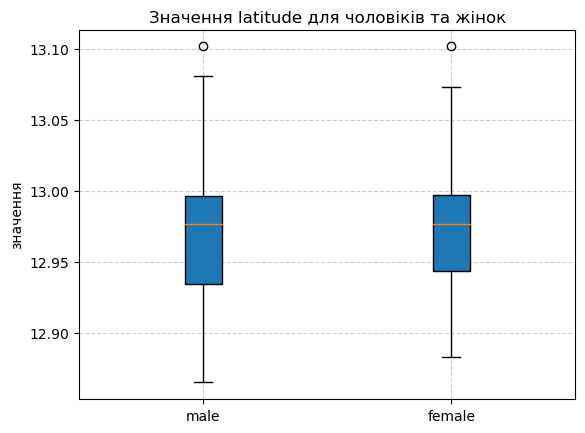

In [47]:
data_1 = [male, female]
fig, ax = plt.subplots()
ax.boxplot(data_1, patch_artist=True, labels=['male', 'female'])

ax.set_title('Значення latitude для чоловіків та жінок')
ax.set_ylabel('значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

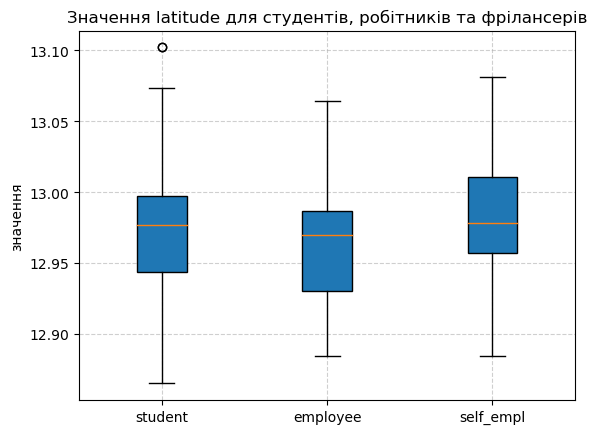

In [74]:
data_2 = [student, employee, self_empl]
fig, ax = plt.subplots()
ax.boxplot(data_2, patch_artist=True, labels=['student', 'employee', 'self_empl'])

ax.set_title('Значення latitude для студентів, робітників та фрілансерів')
ax.set_ylabel('значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

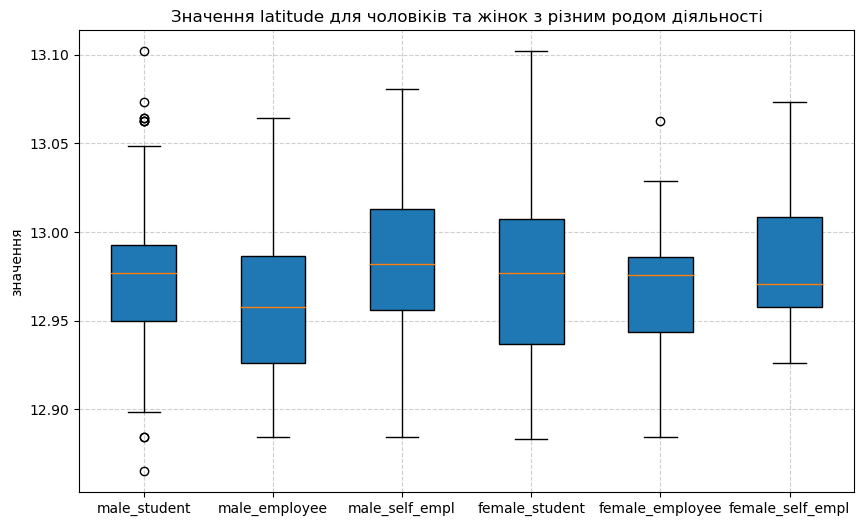

In [79]:
data_3 = [male_student, male_employee, male_self_empl, female_student, female_employee, female_self_empl]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_3, patch_artist=True, labels=['male_student', 'male_employee', 'male_self_empl', 'female_student', 
                                             'female_employee', 'female_self_empl'])

ax.set_title('Значення latitude для чоловіків та жінок з різним родом діяльності')
ax.set_ylabel('значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Дослідимо вплив статі (змінна "Gender") на значення змінної "latitude". Сформулюємо гіпотези:

Н0 - середні значення latitude для чоловіків та жінок не відрізняються
Н1 - середні значення latitude для чоловіків та жінок відрізняються

Проведемо однофакторний дисперсійний аналіз

In [72]:
from scipy.stats import f_oneway

f_value, p_value = f_oneway(male, female)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 0.8336937752919856
p-значення 0.36177654013951877


Отримали р-значення більше за порогове (0.05), отже можемо прийняти нуьову гіпотезу і зробити висновок, що середні значення змінної latitude для чоловіків та жінок не відрізняються, а отже стать не має впливу на змінну latitude.

Дослідимо вплив виду діяльності на значення змінної latitude. Сформулюємо гіпотези:

Н0 - середні значення latitude для студентів, робітників та фрілансерів не відрізняються
Н1 - середні значення latitude для студентів, робітників та фрілансерів відрізняються

Проведемо однофакторний дисперсійний аналіз.

In [96]:
f_value, p_value = f_oneway(self_empl, student, employee)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 3.7379953959004046
p-значення 0.024690923993114455


Отримали р-значення менше за порогове, отже можемо відкинути нульову гіпотезу і зробити висновок, що існує статистично значущп різниця між середніми latitude для студентів, робітників та фрілансерів, отже можна сказати, що рід діяльності має вплив на цю змінну.

Тепер порівняємо між собою групи людей конкретної статі з різним родом діяльності. Наприклад порівняємо середні значення latitude для жінок студентів, робітників та фрілансерів. Сформулюєно гіпотези:

Н0 - середні значення latitude для жінок студентів, робітниць та фрілансерок не відрізняються
Н1 - середні значення latitude для жінок студентів, робітниць та фрілансерок не відрізняються

Проведемо однофакторний дисперсійний аналіз

In [80]:
f_value, p_value = f_oneway(female_student, female_employee, female_self_empl)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 1.2127941028587716
p-значення 0.30018926431553067


Отримали р-значення більше за порогове, отже можна прийняти нульову гіпотезу і зробити висновок, що не існує статистично значущої різниці між середніми значеннями latitude для жінок різного роду діяльності.

Аналогічний аналіз проведемо для чоловіків з різним родом діяльності. Сформулюємо гіпотези:

Н0 - середні значення latitude для чоловіків студентів, робітників та фрілансерів не відрізняється
Н1 - середні значення latitude для чоловіків студентів, робітників та фрілансерів відрізняється

In [82]:
f_value, p_value = f_oneway(male_student, male_employee, male_self_empl)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 2.6649235369426556
p-значення 0.07186169784124072


Отримали р-значення більше за порогове, отже маємо право прийняти нульову гіпотезу і зробити висновок, що не існує статистично значущої різниці між середніми значеннями latitude для чоловіків різного роду діяльності. Прооте, оскільки наші дані розподілені не за нормальним законом розподілу, то результати можуть бути неправдивими.

Оскільки, в ході аналізу було виявлено статистично значущі відмінності між середніми значеннями latitude для людей з різною діяльністю, то проведемо тест Тьюкі щоб з'ясувати між якими, конкретно, групами існують ці відмінності

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

data = np.concatenate([student, employee, self_empl])
groups = ['student'] * len(student) + ['employee'] * len(employee) + ['self_empl'] * len(self_empl)

df1 = pd.DataFrame({'змінна': data, 'Діяльність': groups})

tukey_test = pairwise_tukeyhsd(endog=df1['змінна'], groups=df1['Діяльність'], alpha=0.05)
print(tukey_test)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 employee self_empl   0.0169 0.0554 -0.0003 0.0341  False
 employee   student    0.012 0.0516 -0.0001 0.0241  False
self_empl   student  -0.0049 0.7525 -0.0209 0.0111  False
---------------------------------------------------------


В результаті проведення тесту Тьюкі отримали значення, що свідчать про те, що між групами не існує статистично значущої різниці, що суперечить обчисленням, проведеним раніше. Це може бути пов'язано з тим, що дані розподілені не за нормальним законом,що не підходить для параметричних тестів, в тому числі і для дисперсійного аналізу.